In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Feature shape:", X.shape)
print("Classes:", cancer.target_names)
print("Feature names:", cancer.feature_names[:5])


Feature shape: (569, 30)
Classes: ['malignant' 'benign']
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [3]:
# Standardize features for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [4]:
svm_cancer = SVC(kernel='linear', C=1)
svm_cancer.fit(X_train, y_train)
y_pred = svm_cancer.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



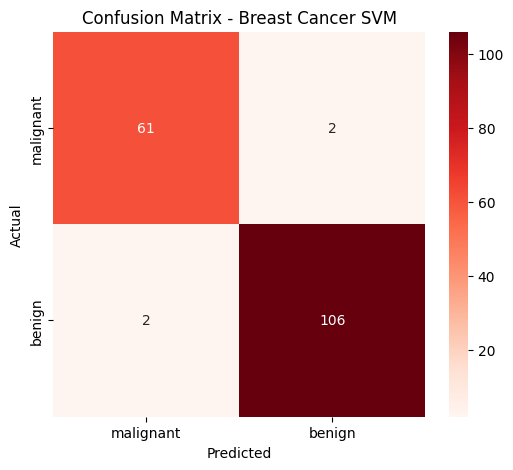

In [5]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='d',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix - Breast Cancer SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
